In [1]:
import numpy as np

from qiskit import *
from qiskit.visualization import *


In [2]:
# number of qubits
n = 4
# iterations
r = 3

In [3]:
# --------- Initialization ---------
grovers = QuantumCircuit(n + 1, n)

for i in range(n):
    grovers.h(i)

grovers.barrier()


In [4]:
# -------- Finalization ---------

for i in range(r):

    for i in range(n):
        if i == 1 or i == 2:
            grovers.x(i)

    grovers.barrier()

    # Phase Inversion    
    grovers.h(3)
    
    grovers.barrier()

    grovers.ccx(0, 1, 4)

    grovers.ccx(2, 4, 3)

    grovers.ccx(0, 1, 4)

    grovers.barrier()
    
    grovers.h(3)
    
    grovers.barrier()

    for i in range(n):
        if i == 1 or i == 2:
            grovers.x(i)

    grovers.barrier()

    for i in range(n):
        grovers.h(i)
        grovers.x(i)

    grovers.barrier()

# ------- inversion about the mean -------
    grovers.h(3)
    
    grovers.ccx(0, 1, 4) 

    grovers.ccx(2, 4, 3)

    grovers.ccx(0, 1, 4)

    grovers.h(3)
    
    grovers.barrier()

    for i in range(n):
        grovers.x(i)
        grovers.h(i)

    grovers.barrier()

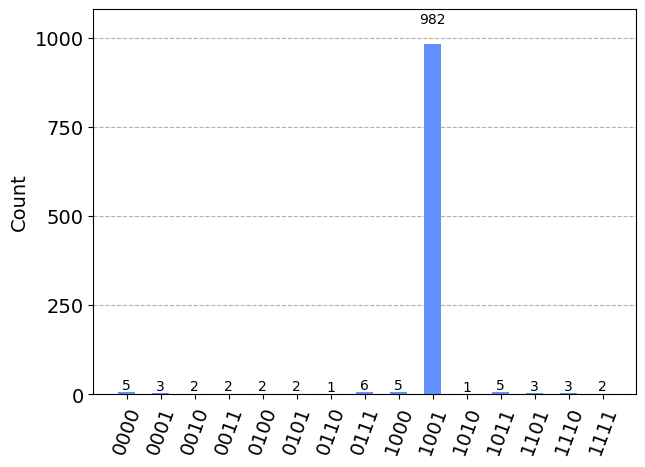

In [5]:
# --------- run simulation ---------
for i in range(n):
   grovers.measure(i, i)

quasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(grovers, quasm_sim )
result = quasm_sim.run(qobj).result()
answer = result.get_counts()
plot_histogram(answer)


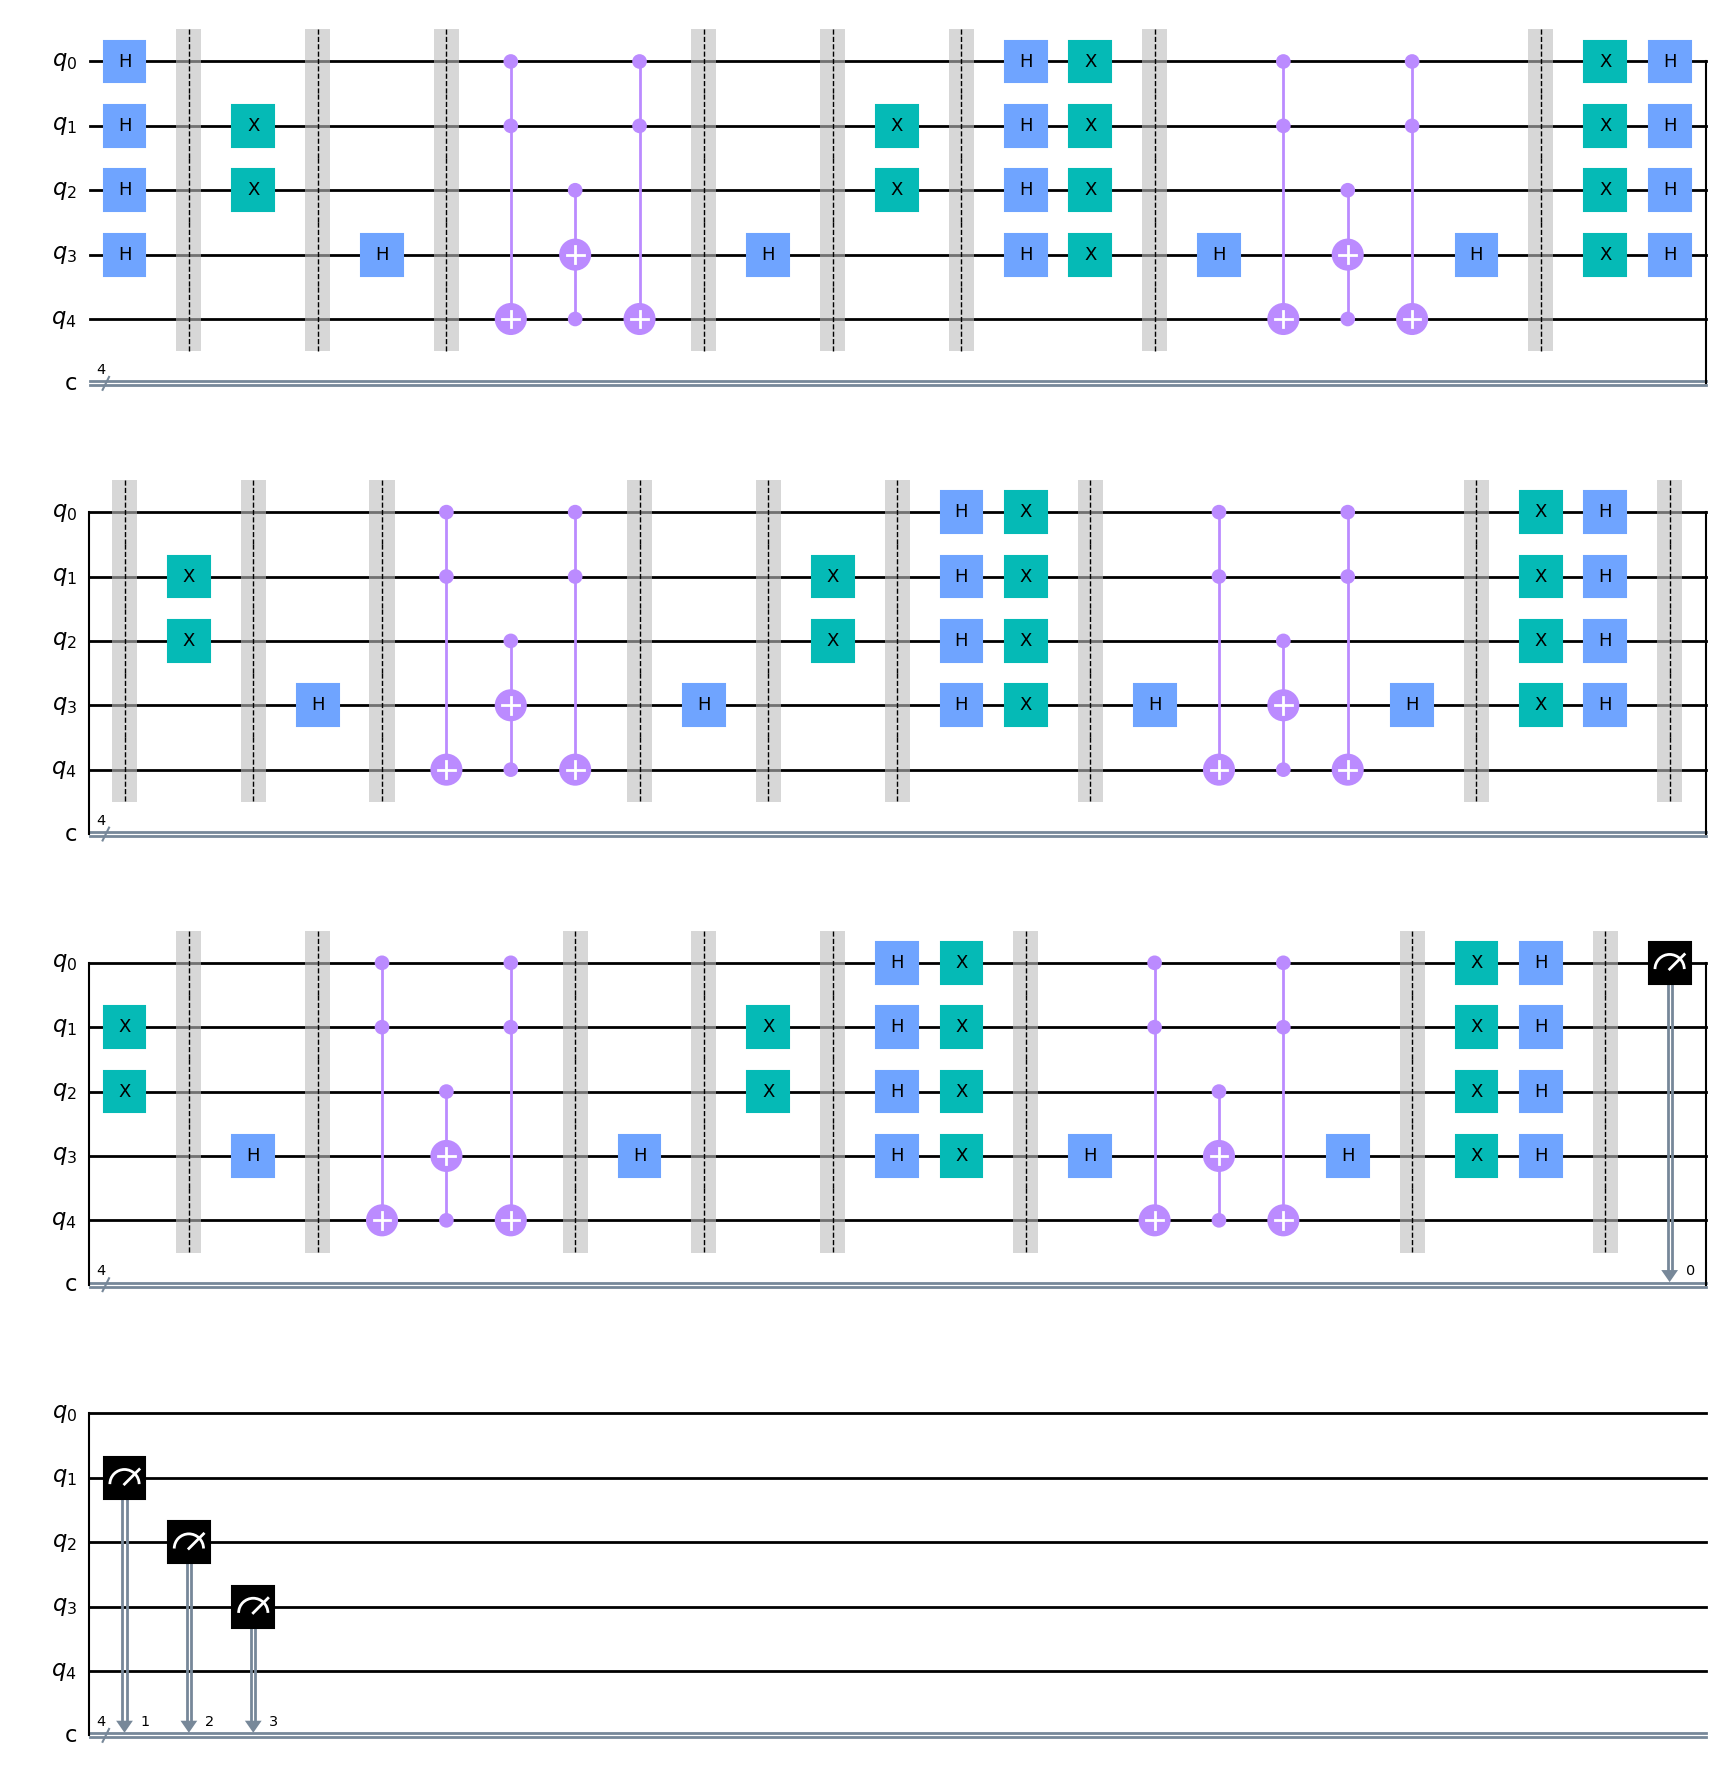

In [6]:
grovers.draw(output='mpl', filename="grovers_circuit.png")